   **Nitish**
   
   **PCA analysis**
                                 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [74]:
#Reading the data and understanding it's inticacies hence removed the auto-generated index
columns = ['0', 'genes']
df = pd.read_csv("/kaggle/input/gene-expression/DemoExample_GeneExpression.csv", index_col=0,delimiter='\t')
df.head()

,C1-1,C1-2,C1-3,C1-4,C1-5,C1-6,C1-7,C1-8,C1-9,C1-10,...,C2-3,C2-4,C2-5,C2-6,C2-7,C2-8,C2-9,C2-10,C2-11,C2-12
Acap2,1528,1341,1430,1192,3612,1899,2324,2354,1830,1430,...,562,505,1789,592,740,554,1185,459,629,1061
Arc,6877,3871,5334,4252,6916,4640,5300,10312,16238,8795,...,16,0,127,109,0,12,8,7,3,549
Arpp21,5558,2232,3911,2947,6008,4147,2375,4298,8915,4418,...,790,314,1288,860,385,816,976,715,614,794
Atf3,2472,1770,1660,2000,2401,2778,2132,3060,3106,1880,...,1,10,10,40,10,10,10,11,10,10
Atf4,975,480,2168,1231,1785,1971,1454,1837,1747,2053,...,118,511,343,2533,1,2676,637,16,640,572


In [4]:
#Transposed the dataframe for PCA analysis
df = df.transpose()
print(df)

       Acap2    Arc  Arpp21  Atf3  Atf4  Bdnf  Brd9  Calb1  Camkv  Cdk14  ...  \
C1-1    1528   6877    5558  2472   975  6507    92    317    155    436  ...   
C1-2    1341   3871    2232  1770   480  3317    85     18     43     44  ...   
C1-3    1430   5334    3911  1660  2168  3480   297     56     50     47  ...   
C1-4    1192   4252    2947  2000  1231  3872    12     72     21      7  ...   
C1-5    3612   6916    6008  2401  1785  3911   221    749    608    476  ...   
C1-6    1899   4640    4147  2778  1971  3560   175    493      9     88  ...   
C1-7    2324   5300    2375  2132  1454  3125    26    304    165     47  ...   
C1-8    2354  10312    4298  3060  1837  4309   360    690    513    578  ...   
C1-9    1830  16238    8915  3106  1747  7108   352    544    524    675  ...   
C1-10   1430   8795    4418  1880  2053  4577   376     72    445    358  ...   
C1-11   1576  10223    4594  2645   978  5500    97    890    945    973  ...   
C1-12   1075   5562    2925 

In [10]:
#from sklearn.preprocessing import StandardScaler
df1 = pd.DataFrame(df)
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
print(df1)

[[ 0.32290247  0.72372756  1.35975156 ...  1.1354075   0.84208893
   1.46201485]
 [ 0.07424319  0.03578731 -0.14891212 ... -0.81266896 -0.45655722
  -0.82784265]
 [ 0.19258905  0.37060321  0.61267727 ... -0.63632728  0.01904508
  -1.34575197]
 ...
 [-1.09857759 -0.84851113 -0.8370188  ... -1.49724066 -1.20255646
  -1.38866861]
 [-0.8725237  -0.84942655 -0.8828321  ... -0.41090938 -0.84770677
  -0.37612679]
 [-0.29808087 -0.72447134 -0.80118463 ...  0.4533312  -0.48544894
   0.56949416]]


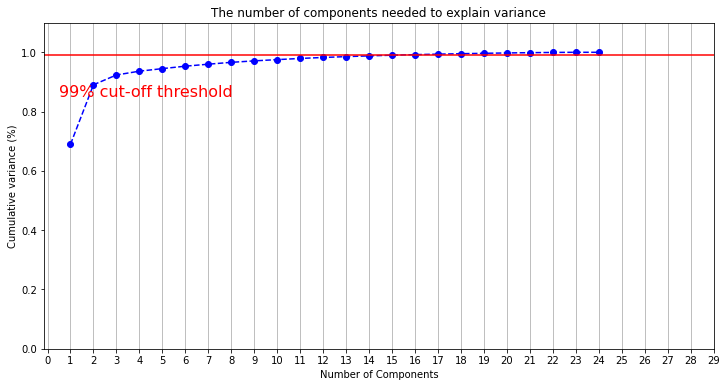

In [32]:
pca = PCA().fit(df)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 25, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
In this case, to get 99% of variance explained I need 15,16 or 17 principal components.

In [68]:
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=16)
pca = pcamodel.fit_transform(df1)
df2 = pd.DataFrame.from_dict(df2)
pca.shape
print(df2)

          0         1         2         3         4         5         6   \
0   0.322902  0.723728  1.359752  1.082361 -0.168320  1.887331 -0.985252   
1   0.074243  0.035787 -0.148912  0.499381 -0.766835  0.406328 -0.991731   
2   0.192589  0.370603  0.612677  0.408031  1.274162  0.482003 -0.795536   
3  -0.123886  0.122981  0.175410  0.690386  0.141215  0.663995 -1.059288   
4   3.094057  0.732653  1.563870  1.023398  0.811068  0.682101 -0.865870   
5   0.816232  0.211777  0.719726  1.336480  1.035965  0.519144 -0.908440   
6   1.381367  0.362822 -0.084048  0.800006  0.410849  0.317189 -1.046332   
7   1.421258  1.509847  0.788219  1.570669  0.873943  0.866878 -0.737233   
8   0.724481  2.866046  2.882477  1.608870  0.765122  2.166354 -0.744637   
9   0.192589  1.162673  0.842651  0.590731  1.135113  0.991301 -0.722426   
10  0.386729  1.489479  0.922484  1.226030 -0.164692  1.419817 -0.980625   
11 -0.279465  0.422782  0.165431  0.692046  0.699829  0.511716 -1.057437   
12 -0.526794

Explained variance is the amount of variance explained by each of the selected components. This attribute is associated with the sklearn PCA model as explained_variance_

Explained variance ratio is the percentage of variance explained by each of the selected components. It’s attribute is explained_variance_ratio_

In [35]:
pcamodel.explained_variance_

array([40.66179776, 19.46834568,  3.73080359,  2.42241265,  2.2465024 ,
        2.04798796,  1.62978155,  1.42052316,  1.10640119,  1.04163163,
        0.9144562 ,  0.7531289 ,  0.66769869,  0.59609139,  0.52071354,
        0.43910684])

This explains the amount of variance in each component that explains the data.

**explained_variance_ratio_ plot**

percentage of variance explained by each of the selected components.

In [75]:
pcamodel.explained_variance_ratio_

array([0.49958405, 0.23919442, 0.04583786, 0.02976255, 0.02760126,
       0.02516225, 0.02002403, 0.01745301, 0.0135936 , 0.01279782,
       0.01123531, 0.00925319, 0.00820356, 0.00732377, 0.00639766,
       0.00539501])

**explained_variance_ plot**

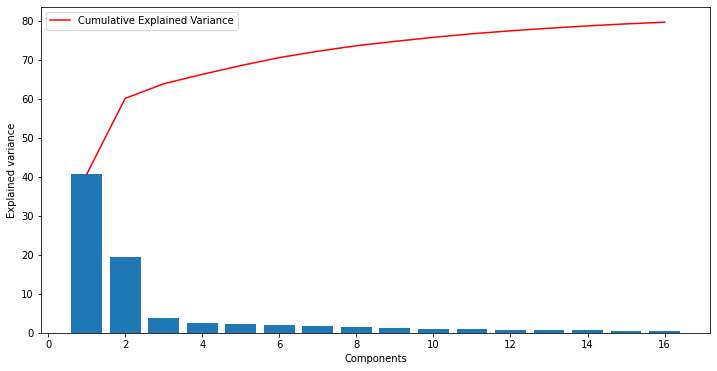

In [76]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

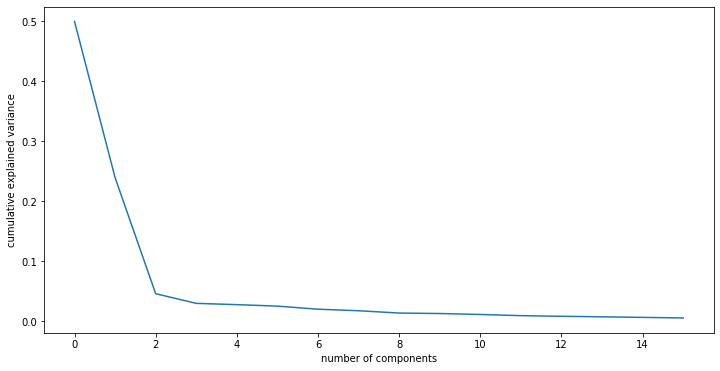

In [64]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

**Scree plot**

Scree plot is nothing but plot of eigen values(explained_variance_) for each of the components

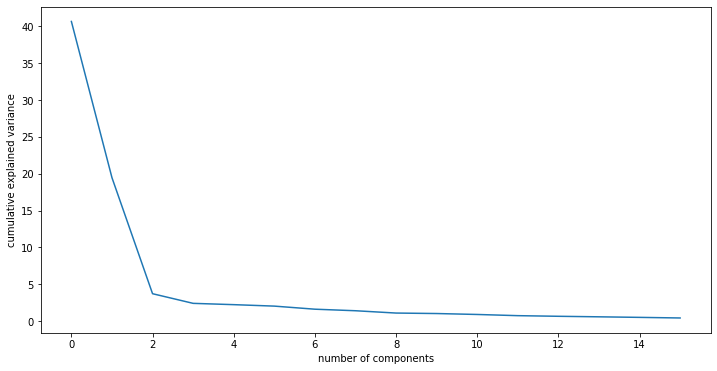

In [77]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Scatter plot of PCA1 and PCA2**

pca helds all PCA components. First two of them can be visualized using scatter plot.

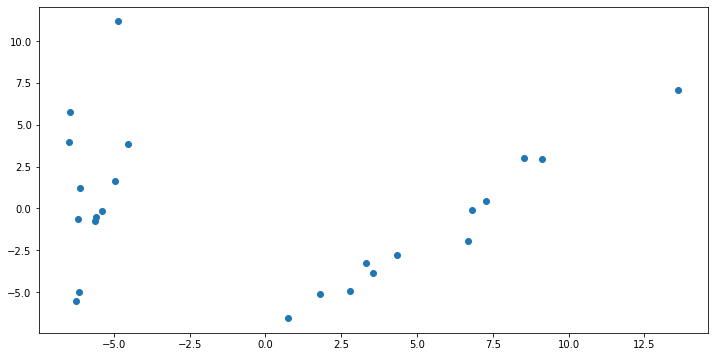

In [66]:
plt.scatter(pca[:, 0], pca[:, 1])

**Effect of variables on each components**

components_ attribute provides principal axes in feature space, representing the directions of maximum variance in the data. This means, we can see influence on each of the components by features.

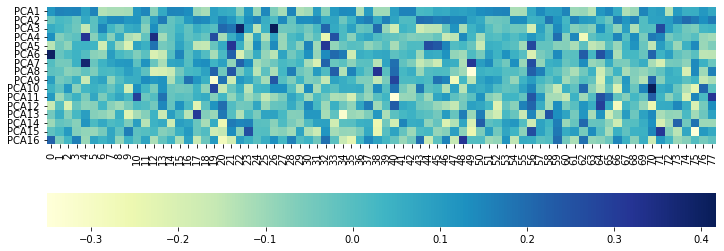

In [70]:
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(df2),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

The influence of features in this dataset is betwwen 0.0 to -0.2

**PCA Biplot**

Biplot is an interesting plot and contains lot of useful information.

It contains two plots:

PCA scatter plot which shows first two component ( We already plotted this above)
PCA loading plot which shows how strongly each characteristic influences a principal component.

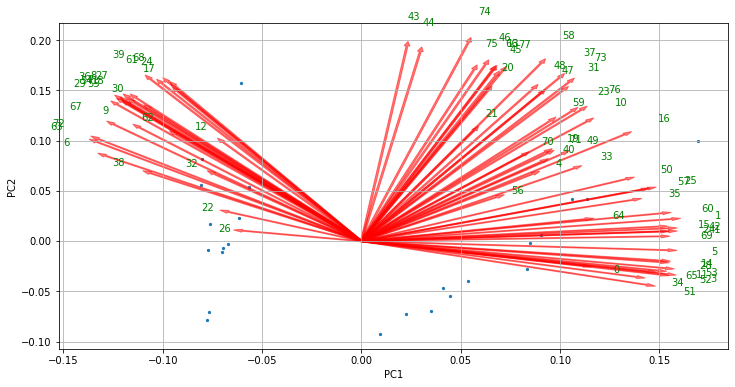

In [71]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 0.25/(xs.max() - xs.min())
    scaley = 0.25/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(df2.columns))
plt.show()

**PCA Loading Plot** 

All vectors start at origin and their projected values on components explains how much weight they have on that component. Also , angles between individual vectors tells about correlation between them.